##تعريف المكتبات 

In [1]:
import numpy as np  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt



#sns.set_style("whitegrid")



In [2]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.1


In [3]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

^C
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15976 sha256=fa4a370d11c1e2df778cfa06b319806db0ec102e4c078c2e8129080829d6b6ad
  Stored in directory: c:\users\abdulhamid\appdata\local\pip\cache\wheels\b1\d9\12\045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [7]:
BC = pd.read_csv('bc_97.csv')


In [8]:
BC.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.4,10.0,20.0,10.0,...,3.4,4.60,13.4,196.0,14.0,150.0,145.0,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,NaN,9.3,11.0,17.0,...,4.4,5.00,12.5,155.0,NaN,260.0,139.2,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.5,8.5,13.0,10.0,...,5.1,4.46,13.8,312.0,NaN,169.0,140.0,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.2,8.0,7.0,13.0,...,3.1,4.33,10.7,212.0,10.0,138.0,136.4,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.0,NaN,9.0,15.0,...,4.2,4.13,12.3,243.0,5.0,154.0,NaN,4.00,106.2,0


In [9]:
BC.shape

(2435, 23)

<a id = "6"></a><br>
## Missing Values

In [10]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## outlires by Z-score


In [11]:
BC["ZScore_FBS"] = (BC.FBS - BC.FBS.mean())/(BC.FBS.std())
BC["ZScore_Urea"] = (BC.Urea - BC.Urea.mean())/(BC.Urea.std())
BC["ZScore_creatinine"] = (BC.Creatinin - BC.Creatinin.mean())/(BC.Creatinin.std())
BC["ZScore_ALB"] = (BC.ALB - BC.ALB.mean())/(BC.ALB.std())
BC["ZScore_TCa"] = (BC.TCa - BC.TCa.mean())/(BC.TCa.std())
BC["ZScore_GPT"] = (BC.GPT - BC.GPT.mean())/(BC.GPT.std())
BC["ZScore_GOT"] = (BC.GOT - BC.GOT.mean())/(BC.GOT.std())
BC["ZScore_ALP"] = (BC.ALP - BC.ALP.mean())/(BC.ALP.std())
BC["ZScore_CA15"] = (BC.CA15 - BC.CA15.mean())/(BC.CA15.std())
BC["ZScore_CEA"] = (BC.CEA - BC.CEA.mean())/(BC.CEA.std())
BC["ZScore_WBC"] = (BC.WBC - BC.WBC.mean())/(BC.WBC.std())
BC["ZScore_RBC"] = (BC.RBC - BC.RBC.mean())/(BC.RBC.std())
BC["ZScore_HGB"] = (BC.HGB - BC.HGB.mean())/(BC.HGB.std())
BC["ZScore_PLT"] = (BC.PLT - BC.PLT.mean())/(BC.PLT.std())
BC["ZScore_ESR"] = (BC.ESR - BC.ESR.mean())/(BC.ESR.std())
BC["ZScore_LDH"] = (BC.LDH - BC.LDH.mean())/(BC.LDH.std())
BC["ZScore_Na"] = (BC.Na - BC.Na.mean())/(BC.Na.std())
BC["ZScore_CL"] = (BC.CL - BC.CL.mean())/(BC.CL.std())
BC["ZScore_K"] = (BC.K - BC.K.mean())/(BC.K.std())



In [12]:
BC_FBS_outlier_Z = BC[(BC.ZScore_FBS>3) | (BC.ZScore_FBS<-3)]
BC_Urea_outlier_Z = BC[(BC.ZScore_Urea>3) | (BC.ZScore_Urea<-3)]
BC_creatinine_outlier_Z = BC[(BC.ZScore_creatinine>3) | (BC.ZScore_creatinine<-3)]
BC_ALB_outlier_Z = BC[(BC.ZScore_ALB>3) | (BC.ZScore_ALB<-3)]
BC_TCa_outlier_Z = BC[(BC.ZScore_TCa>3) | (BC.ZScore_TCa<-3)]
BC_GPT_outlier_Z = BC[(BC.ZScore_GPT>3) | (BC.ZScore_GPT<-3)]
BC_GOT_outlier_Z = BC[(BC.ZScore_GOT>3) | (BC.ZScore_GOT<-3)]
BC_ALP_outlier_Z = BC[(BC.ZScore_ALP>3) | (BC.ZScore_ALP<-3)]
BC_CA15_outlier_Z = BC[(BC.ZScore_CA15>3) | (BC.ZScore_CA15<-3)]
BC_CEA_outlier_Z = BC[(BC.ZScore_CEA>3) | (BC.ZScore_CEA<-3)]
BC_WBC_outlier_Z = BC[(BC.ZScore_WBC>3) | (BC.ZScore_WBC<-3)]
BC_RBC_outlier_Z = BC[(BC.ZScore_RBC>3) | (BC.ZScore_RBC<-3)]
BC_HGB_outlier_Z = BC[(BC.ZScore_HGB>3) | (BC.ZScore_HGB<-3)]
BC_PLT_outlier_Z = BC[(BC.ZScore_PLT>3) | (BC.ZScore_PLT<-3)]
BC_ESR_outlier_Z = BC[(BC.ZScore_ESR>3) | (BC.ZScore_ESR<-3)]
BC_LDH_outlier_Z = BC[(BC.ZScore_LDH>3) | (BC.ZScore_LDH<-3)]
BC_Na_outlier_Z = BC[(BC.ZScore_Na>3) | (BC.ZScore_Na<-3)]
BC_K_outlier_Z = BC[(BC.ZScore_CL>3) | (BC.ZScore_CL<-3)]
BC_CL_outlier_Z = BC[(BC.ZScore_K>3) | (BC.ZScore_K<-3)]


In [13]:
BC.isnull().sum()

Sex                  0
Age                  0
Adress               0
FBS                  0
Urea                 0
Creatinin            0
ALB                  0
TCa                  0
GPT                  0
GOT                  0
ALP                  0
CA15                 0
CEA                  0
WBC                  0
RBC                  0
HGB                  0
PLT                  0
ESR                  0
LDH                  0
Na                   0
K                    0
CL                   0
CLASS                0
ZScore_FBS           0
ZScore_Urea          0
ZScore_creatinine    0
ZScore_ALB           0
ZScore_TCa           0
ZScore_GPT           0
ZScore_GOT           0
ZScore_ALP           0
ZScore_CA15          0
ZScore_CEA           0
ZScore_WBC           0
ZScore_RBC           0
ZScore_HGB           0
ZScore_PLT           0
ZScore_ESR           0
ZScore_LDH           0
ZScore_Na            0
ZScore_CL            0
ZScore_K             0
dtype: int64

In [14]:
#assigning nan to the outliers

BC['FBS'].values[BC['ZScore_FBS'] > 3] = np.nan
BC['FBS'].values[BC['ZScore_FBS'] < -3] = np.nan

BC['Urea'].values[BC['ZScore_Urea'] > 3] = np.nan
BC['Urea'].values[BC['ZScore_Urea'] < -3] = np.nan

BC['Creatinin'].values[BC['ZScore_creatinine'] > 3] = np.nan
BC['Creatinin'].values[BC['ZScore_creatinine'] < -3] = np.nan

BC['ALB'].values[BC['ZScore_ALB'] > 3] = np.nan
BC['ALB'].values[BC['ZScore_ALB'] < -3] = np.nan

BC['TCa'].values[BC['ZScore_TCa'] > 3] = np.nan
BC['TCa'].values[BC['ZScore_TCa'] < -3] = np.nan

BC['GPT'].values[BC['ZScore_GPT'] > 3] = np.nan
BC['GPT'].values[BC['ZScore_GPT'] < -3] = np.nan

BC['GOT'].values[BC['ZScore_GOT'] > 3] = np.nan
BC['GOT'].values[BC['ZScore_GOT'] < -3] = np.nan

BC['ALP'].values[BC['ZScore_ALP'] > 3] = np.nan
BC['ALP'].values[BC['ZScore_ALP'] < -3] = np.nan

BC['CA15'].values[BC['ZScore_CA15'] > 3] = np.nan
BC['CA15'].values[BC['ZScore_CA15'] < -3] = np.nan

BC['CEA'].values[BC['ZScore_CEA'] > 3] = np.nan
BC['CEA'].values[BC['ZScore_CEA'] < -3] = np.nan

BC['WBC'].values[BC['ZScore_WBC'] > 3] = np.nan
BC['WBC'].values[BC['ZScore_WBC'] < -3] = np.nan

BC['RBC'].values[BC['ZScore_RBC'] > 3] = np.nan
BC['RBC'].values[BC['ZScore_RBC'] < -3] = np.nan

BC['HGB'].values[BC['ZScore_HGB'] > 3] = np.nan
BC['HGB'].values[BC['ZScore_HGB'] < -3] = np.nan

BC['PLT'].values[BC['ZScore_PLT'] > 3] = np.nan
BC['PLT'].values[BC['ZScore_PLT'] < -3] = np.nan

BC['ESR'].values[BC['ZScore_ESR'] > 3] = np.nan
BC['ESR'].values[BC['ZScore_ESR'] < -3] = np.nan

BC['LDH'].values[BC['ZScore_LDH'] > 3] = np.nan
BC['LDH'].values[BC['ZScore_LDH'] < -3] = np.nan

BC['Na'].values[BC['ZScore_Na'] > 3] = np.nan
BC['Na'].values[BC['ZScore_Na'] < -3] = np.nan

BC['CL'].values[BC['ZScore_CL'] > 3] = np.nan
BC['CL'].values[BC['ZScore_CL'] < -3] = np.nan

BC['K'].values[BC['ZScore_K'] > 3] = np.nan
BC['K'].values[BC['ZScore_K'] < -3] = np.nan


In [15]:
BC.drop(["ZScore_FBS","ZScore_Urea","ZScore_creatinine","ZScore_ALB","ZScore_TCa","ZScore_GPT","ZScore_GOT","ZScore_ALP",
        "ZScore_CA15","ZScore_CEA","ZScore_WBC","ZScore_RBC","ZScore_HGB","ZScore_PLT","ZScore_ESR","ZScore_LDH",
        "ZScore_Na","ZScore_CL","ZScore_K"],axis=1,inplace=True)

BC.isnull().sum()


Sex           0
Age           0
Adress        0
FBS          32
Urea         11
Creatinin    30
ALB           4
TCa          27
GPT           4
GOT           5
ALP          32
CA15          1
CEA           1
WBC           0
RBC          11
HGB           0
PLT           0
ESR          58
LDH          18
Na           13
K             7
CL           64
CLASS         0
dtype: int64

In [16]:
#imputing nan values

BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["TCa"].fillna(BC["TCa"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,Sabha,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,Sabha,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,Obaree-center,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,Obaree-center,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,Sabha,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,Sabha,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,Sabha,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


# LabelEncoder for object featurs

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])

In [18]:
print(BC.Adress.unique())

[24 19 17  3 16  6  4 13 27 18 25 26 22  5 12 10 23  7 15  8  2  1 11 20
  0  9 21 14 28 29]


In [19]:
BC

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,100.0,23.0,0.8,3.400000,10.000,20.0,10.0,...,3.4,4.60,13.4,196.0,14.000000,150.0,145.000000,4.50,107.1,0
1,1,53,19,190.0,27.0,0.6,6.025476,9.300,11.0,17.0,...,4.4,5.00,12.5,155.0,24.520661,260.0,139.200000,4.17,106.4,0
2,1,50,19,150.0,15.0,1.1,3.500000,8.500,13.0,10.0,...,5.1,4.46,13.8,312.0,24.520661,169.0,140.000000,4.00,100.1,0
3,1,36,17,80.0,20.0,1.0,4.200000,8.000,7.0,13.0,...,3.1,4.33,10.7,212.0,10.000000,138.0,136.400000,4.06,107.1,0
4,1,30,17,80.0,40.0,0.8,3.000000,9.946,9.0,15.0,...,4.2,4.13,12.3,243.0,5.000000,154.0,153.698856,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146.0,28.0,0.7,4.000000,9.500,63.0,23.0,...,3.9,5.23,11.3,288.0,15.000000,254.0,138.700000,4.35,103.6,1
2431,1,47,19,90.0,32.0,0.8,4.700000,8.800,82.0,23.0,...,4.8,4.57,13.2,249.0,12.000000,254.0,142.300000,4.40,102.7,1
2432,1,43,19,70.0,15.0,0.6,3.500000,8.100,22.0,15.0,...,4.4,4.32,11.1,249.0,8.000000,254.0,137.800000,4.25,110.2,1
2433,1,60,19,98.0,29.0,0.9,4.800000,8.200,51.0,17.0,...,4.5,4.41,12.9,293.0,13.000000,254.0,147.500000,3.15,107.5,1


## بناء النموذج

##  تقسيم البيانات

In [20]:

X=BC.drop(["CLASS","Adress","Sex","Na","CL","K","Creatinin","GOT","HGB"],axis=1)
y=BC["CLASS"]  


In [26]:
X

,Age,FBS,Urea,ALB,TCa,GPT,ALP,CA15,CEA,WBC,RBC,PLT,ESR,LDH
0,60,100.0,23.0,3.400000,10.000,20.0,124.000000,17.18,3.87,3.4,4.60,196.0,14.000000,150.0
1,53,190.0,27.0,6.025476,9.300,11.0,133.000000,13.00,0.12,4.4,5.00,155.0,24.520661,260.0
2,50,150.0,15.0,3.500000,8.500,13.0,155.000000,14.50,1.18,5.1,4.46,312.0,24.520661,169.0
3,36,80.0,20.0,4.200000,8.000,7.0,178.404885,20.13,3.12,3.1,4.33,212.0,10.000000,138.0
4,30,80.0,40.0,3.000000,9.946,9.0,125.000000,13.25,1.25,4.2,4.13,243.0,5.000000,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,30,146.0,28.0,4.000000,9.500,63.0,234.000000,19.02,1.65,3.9,5.23,288.0,15.000000,254.0
2431,47,90.0,32.0,4.700000,8.800,82.0,190.000000,9.21,0.32,4.8,4.57,249.0,12.000000,254.0
2432,43,70.0,15.0,3.500000,8.100,22.0,143.000000,21.00,1.12,4.4,4.32,249.0,8.000000,254.0
2433,60,98.0,29.0,4.800000,8.200,51.0,104.000000,21.37,2.02,4.5,4.41,293.0,13.000000,254.0


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: CLASS, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [28]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [29]:
print(X.shape)
print(y.shape)

(2435, 14)
(2435,)


In [30]:
print(X_train.shape)
print(y_train.shape)


(1826, 14)
(1826,)


In [31]:
print(X_test.shape)


(609, 14)


# تطبيق الخوارزمية

In [32]:
## شجرة القرار قبل الضبظ

In [33]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=22,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [34]:
# تدريب الخوارزمية 

In [35]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[0 0 0 ... 1 1 1]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [36]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

0.9709748083242059

## طريقة 2 لايجاد الدقة

In [37]:
D_classifier.score(X_train,y_train)

0.9709748083242059

## نفس السابق توجد طريقتين لايجاد الدقة مجموعة الأختبار

In [38]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 

In [39]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc

0.9720853858784894

In [40]:
#الطريقة2
D_classifier.score(X_test,y_test)

0.9720853858784894

In [41]:
## تقرير الدقة وحساب الخطأ

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       338
           1       0.95      0.99      0.97       271

    accuracy                           0.97       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.97      0.97      0.97       609

accuracy_score= 0.9720853858784894


In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.027914614121510674
mean_squared_error is = 0.1670766713862551


In [44]:
#الطريقة2 لحساب الدقة

In [45]:
y_pred_DT=D_classifier.predict_proba(X_test)[:,1]

new_y_DT=[]
for i in range (len(y_pred_DT)):
    if y_pred_DT[i]<=0.5:
        new_y_DT.append(0)
    else:
        new_y_DT.append(1)


In [46]:
accuracy_score(y_test,new_y_DT)

0.9720853858784894

## AUC & RUC



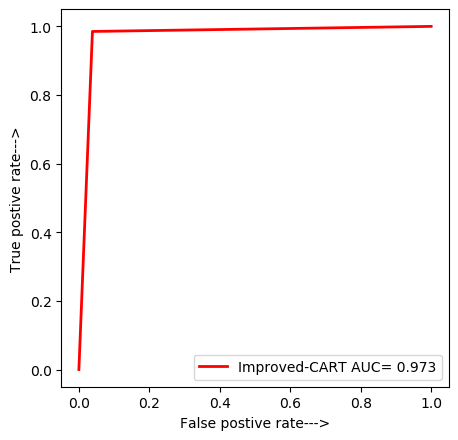

In [47]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,new_y_DT)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
#plt.plot(dec_fpr,dec_tpr,linestyle='-',label='CART AUC=% 0.3f' % auc_dec)
plt.plot(dec_fpr,dec_tpr,c='r',ls='-',lw=2,ms=8,mec='navy',label='Improved-CART AUC=% 0.3f' % auc_dec)


plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


## Uncee-Data

### Age ,	FBS	, Urea,	ALB	,TCa	, GPT	,ALP	, CA15,	CEA	, WBC	,RBC	, PLT	,ESR	, LDH


In [77]:
import pickle

In [78]:
filename = 'trained_model.sav'
pickle.dump(D_classifier, open(filename, 'wb'))

In [79]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [80]:
print(classification_report( D_classifier.predict(X_test) , y_test))
print("DTREE Accuracy:",accuracy_score( D_classifier.predict(X_test) , y_test ) *100,accuracy_score( D_classifier.predict(X_train) , y_train ))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       329
           1       0.99      0.95      0.97       280

    accuracy                           0.97       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.97      0.97      0.97       609

DTREE Accuracy: 97.20853858784893 0.9709748083242059


In [88]:
## 'Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH'

input_data = (40,86,30,6.4,20,50,124,37,1.87,9.4,8.6,196,30,150)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is benign tumor')
else:
    print('The person is milegent tumor')

[1]
The person is milegent tumor


In [89]:
## 'Age','FBS', 'Urea','ALB', 'TCa', 'GPT','ALP','CA15','CEA','WBC','RBC','PLT','ESR','LDH'

input_data = (40,86,30,6.4,20,50,124,37,1.87,9.4,8.6,196,30,150)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is benign tumor')
else:
    print('The person is milegent tumor')

[1]
The person is milegent tumor


In [91]:
input_data = (40,86,30,6.4,20,50,124,20,1.87,9.4,8.6,196,30,150)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is benign tumor')
else:
    print('The person is milegent tumor')

[0]
The person is benign tumor


In [92]:
import pickle

In [93]:
pickle.dump(D_classifier, open('model.pkl','wb'))

In [94]:
model = pickle.load(open('model.pkl', 'rb'))
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=22,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')
